## Imports

In [85]:
import pandas as pd
from streamz import Stream
from streamz.dataframe import DataFrame
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import toolz
import random
from datetime import datetime
from scipy.spatial import distance

## Number of tickets by closest school

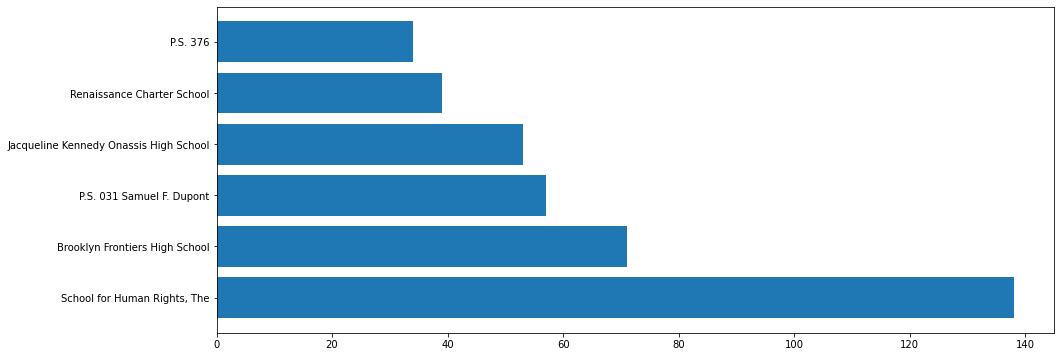

./data/2022.gz.parquet
490/500


In [91]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

d = {}

def stest(r):
    s_name = str(r['Closest_school_name'])
    if s_name in d:
        d[s_name] = d[s_name] + 1
    else:
        d[s_name] = 1
    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            tmp = d.copy()
            #tmp.pop('Unknown', None)
            data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.barh(range(len(data)), list(data.values()), tick_label=list(data.keys()))
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))


## Average price of tickets by closest school

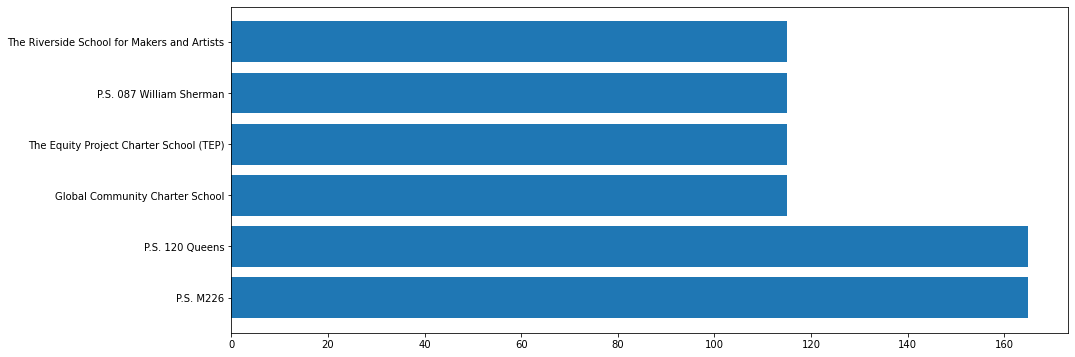

49900/50000


In [39]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

avg = {}
count = {}

def stest(r):
    s_name = str(r['Closest_school_name'])
    if s_name in avg:
        avg[s_name] += (r['Violation Price']-avg[s_name])/count[s_name]
        count[s_name] += 1
    else:
        avg[s_name] = r['Violation Price']
        count[s_name] = 2
    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            tmp = avg.copy()
            #tmp.pop('Unknown', None)
            data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.barh(range(len(data)), list(data.values()), tick_label=list(data.keys()))
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

## Number of tickets by car color

In [69]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

d = {'Gray' : 0, 'White' : 0, 'Unknown' : 0, 'Green' : 0, 'Red' : 0, 'Blue' : 0, 'Black' : 0, 
     'Pink' : 0, 'Silver' : 0, 'Gold' : 0, 'Brown' : 0, 'Yellow' : 0, 'Purple' : 0, 'Orange' : 0}

def stest(r):
    d[str(r['Vehicle Color'])] = d[str(r['Vehicle Color'])] + 1

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            tmp = d.copy()
            tmp.pop('Unknown', None)
            data = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

KeyboardInterrupt: 

## Average ticket price for cars of a given color

In [68]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))


d = {'Gray' : [0,1], 'White' : [0,1], 'Unknown' : [0,1], 'Green' : [0,1], 'Red' : [0,1], 
     'Blue' : [0,1], 'Black' : [0,1], 'Pink' : [0,1], 'Silver' : [0,1], 'Gold' : [0,1], 
     'Brown' : [0,1], 'Yellow' : [0,1], 'Purple' : [0,1], 'Orange' : [0,1]}

def stest(r):
    d[str(r['Vehicle Color'])][0] += (r['Violation Price'] - d[str(r['Vehicle Color'])][0])/d[str(r['Vehicle Color'])][1]
    d[str(r['Vehicle Color'])][1] += 1

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            tmp = d.copy()
            tmp.pop('Unknown', None)
            #tmp = toolz.valmap(calc,tmp)
            data1 = dict(sorted(tmp.items(), key=lambda item: item[1], reverse=True)[:3])
            data2 = dict(sorted(tmp.items(), key=lambda item: item[1])[:3])
            values = list(data1.values()) + list(reversed(list(data2.values())))
            avg = [x[0] for x in values]
            counts = [x[1] for x in values]
            labels = list(data1.keys()) + list(reversed(list(data2.keys())))
            #legend = {'highest':'indianred', 'lowest':'royalblue'}
            #l = list(legend.keys())
            #h = [plt.Rectangle((0,0),1,1, color=legend[label]) for label in l]
            #plt.legend(h, l)
            plt.bar(np.arange(len(avg)), avg, tick_label=labels, 
                    color=['indianred']*3+['royalblue']*3)
            #plt.bar(np.arange(len(counts))+0.15, counts, tick_label=labels, 
            #        color=['indianred']*3+['royalblue']*3,
            #        width = 0.3)
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))


KeyboardInterrupt: 

<Figure size 1080x432 with 0 Axes>

## Number of tickets for each street

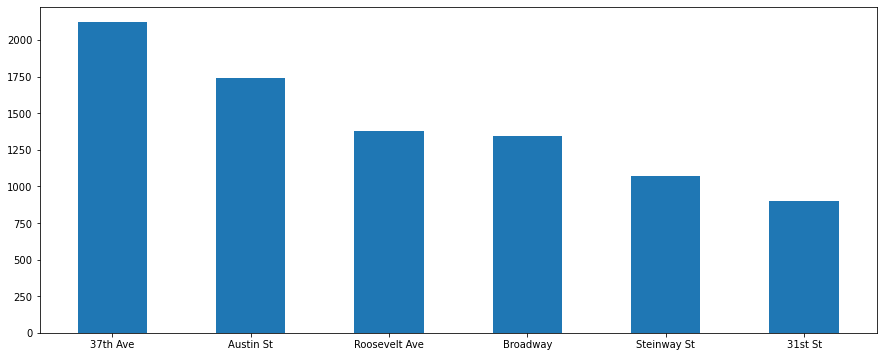

49900/50000


In [16]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

d = dict()

def stest(r):
    street = str(r['Street Name'])
    if street in d:
        d[street] = d[street] + 1
    else:
        d[street] = 1

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            data = dict(sorted(d.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()), width=0.5)
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

With new street name

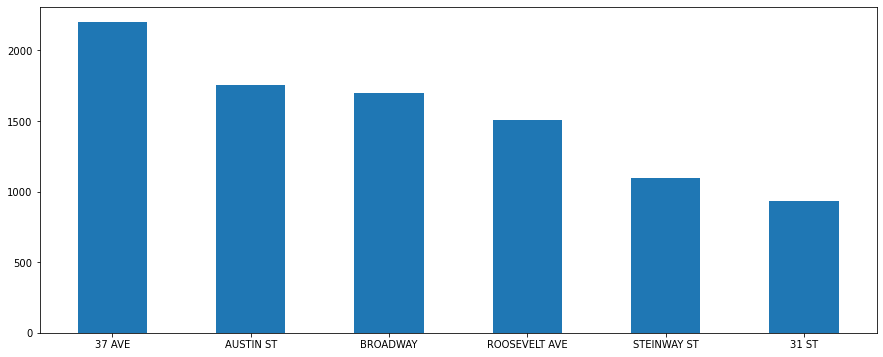

49900/50000


In [15]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

d = dict()

def stest(r):
    street = str(r['NEW Street name'])
    if street in d:
        d[street] = d[street] + 1
    else:
        d[street] = 1

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            data = dict(sorted(d.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()), width=0.5)
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

## Average ticket price for streets

In [67]:

plt.rcParams["figure.figsize"] = (15,6)

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

avg = {}

count = {}


def stest(r):
    s_n = str(r['NEW Street name'])
    if s_n in avg:
        avg[s_n] = avg[s_n] + (r['Violation Price'] - avg[s_n])/count[s_n]
    else:
        avg[s_n] = r['Violation Price']
        count[s_n] = 2
    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            plt.clf()
            data = dict(sorted(avg.items(), key=lambda item: item[1], reverse=True)[:6])
            plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
            plt.show()
            print("{2}\n{0}/{1}".format(i, len(df), j))
        

KeyboardInterrupt: 

<Figure size 1080x432 with 0 Axes>

## Clustering for lat and lang

In [71]:
# Source: https://stackoverflow.com/questions/3698532/online-k-means-clustering
# Or https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/C/sk_means.htm

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

n = 2

random.seed(datetime.now())

loong = [x/100 for x in random.sample(range(-7394, -7388), n)]
laat = [x/100 for x in random.sample(range(4071, 4077), n)]

clusters = [list(a) for a in zip(loong, laat)] # [[lng, lat], ...]
counts = [0]*n

def stest(r):
    lng = r['lng']
    lat = r['lat']
    closest = np.argmin(distance.cdist([[lng, lat]], clusters))
    
    counts[closest] = counts[closest] + 1
    
    clusters[closest][0] = clusters[closest][0] + (1/counts[closest])*(lng-clusters[closest][0])
    clusters[closest][1] = clusters[closest][1] + (1/counts[closest])*(lat-clusters[closest][1])


    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            print("{0}\n{1}/{2}".format(j, i, len(df)))
            print(clusters)
            print(counts)
        

[[-73.89723769453393, 40.76104268217585], [-73.96528856055282, 40.68223537712129]]
[37438, 12463]


## Clustering for lat, long and price

In [96]:
# Source: https://stackoverflow.com/questions/3698532/online-k-means-clustering
# Or https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/C/sk_means.htm

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

n = 5

random.seed(datetime.now())

loong = [x/100 for x in random.sample(range(-7394, -7388), n)]
laat = [x/100 for x in random.sample(range(4071, 4077), n)]

clusters = [list(a) for a in zip(loong, laat)] # [[lng, lat], ...]
prices = random.sample(range(10,500), n)
counts = [0]*n

def stest(r):
    # Get values
    lng = r['lng']
    lat = r['lat']
    price = r['Violation Price']
    
    # Get list of dist
    geo_dist = distance.cdist([[lng, lat]], clusters)
    price_dist = list(map(lambda x: (x-price), prices))
    
    # Normalize by max dist
    max_dist = np.max(geo_dist)
    max_price = np.max(price_dist)
    geo_dist = [x/max_dist for x in geo_dist]
    price_dist = [x/max_price for x in price_dist]
    
    # Sum the two lists
    total_dist = [sum(x) for x in zip(geo_dist, price_dist)]
    
    # Find closest
    closest = np.argmin(total_dist)
    
    # Update values
    counts[closest] = counts[closest] + 1
    clusters[closest][0] = clusters[closest][0] + (1/counts[closest])*(lng-clusters[closest][0])
    clusters[closest][1] = clusters[closest][1] + (1/counts[closest])*(lat-clusters[closest][1])
    prices[closest] = prices[closest] + (1/counts[closest])*(price-prices[closest])

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            print("{0}\n{1}/{2}".format(j, i, len(df)))
            print(clusters)
            print(prices)
            print(counts)
        

[[-73.96503943887669, 40.634109710043], [-73.92873062849242, 40.76343333972178], [-73.88380555928677, 40.858968636454094], [-73.9705648119246, 40.70717279859209], [-73.87426104495047, 40.74336685097063]]
[66.59755339000624, 68.56279751006974, 69.62632841960918, 66.57209865335173, 66.26447876447858]
[4823, 16386, 2917, 6609, 19166]


## Average price

In [94]:

source = Stream()

sources = ['./data/{0}.gz.parquet'.format(x) for x in range(2016,2023)]


sdf = DataFrame(stream = source, example= df.head(1))

price_count = [0,1]

def stest(r):
    price_count[0] = price_count[0] + (r['Violation Price']-price_count[0])/price_count[1]
    price_count[1] = price_count[1] + 1
    

    

sdf.stream.sink(stest)

for j in sources:
    df = pd.read_parquet(j)
    for i in range(len(df)):
        source.emit(df.iloc[i])
        if i%1000==0:
            clear_output(wait=True)
            print("{0}\n{1}/{2}".format(j, i, len(df)))
            print(price_count[0])
        

./data/2019.gz.parquet
1446000/3762826
69.86910046265695


KeyboardInterrupt: 